<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Requirements</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset</a></span><ul class="toc-item"><li><span><a href="#Dataset-description" data-toc-modified-id="Dataset-description-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dataset description</a></span></li><li><span><a href="#Source-dataset" data-toc-modified-id="Source-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Source dataset</a></span></li><li><span><a href="#Get-multipolygon-of-US-states-and-territories-for-filtering" data-toc-modified-id="Get-multipolygon-of-US-states-and-territories-for-filtering-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Get multipolygon of US states and territories for filtering</a></span></li><li><span><a href="#Tidy-dataset-and-extract-new-features" data-toc-modified-id="Tidy-dataset-and-extract-new-features-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tidy dataset and extract new features</a></span></li><li><span><a href="#let's-display-the-US-landfall-hurricanes-in-table-format" data-toc-modified-id="let's-display-the-US-landfall-hurricanes-in-table-format-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>let's display the US landfall hurricanes in table format</a></span></li></ul></li><li><span><a href="#Analysis-of-hurricanes-that-made-US-landfall" data-toc-modified-id="Analysis-of-hurricanes-that-made-US-landfall-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis of hurricanes that made US landfall</a></span><ul class="toc-item"><li><span><a href="#Visualize-storm-tracks-on-map" data-toc-modified-id="Visualize-storm-tracks-on-map-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Visualize storm tracks on map</a></span></li><li><span><a href="#Temporal-range-of-data" data-toc-modified-id="Temporal-range-of-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Temporal range of data</a></span></li><li><span><a href="#Statistical-analysis" data-toc-modified-id="Statistical-analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Statistical analysis</a></span><ul class="toc-item"><li><span><a href="#Category-3+" data-toc-modified-id="Category-3+-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Category 3+</a></span></li><li><span><a href="#Category-4+" data-toc-modified-id="Category-4+-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Category 4+</a></span></li><li><span><a href="#Category-5" data-toc-modified-id="Category-5-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Category 5</a></span></li><li><span><a href="#Multiple-storms-in-the-same-season" data-toc-modified-id="Multiple-storms-in-the-same-season-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Multiple storms in the same season</a></span></li></ul></li></ul></li></ul></div>

* **FA17-BL-INFO-I590-14120**
* **Data Visualization**
* **Gerald Manipon, MS Data Science student - Indiana University**
* **gmanipon@iu.edu**
* **this jupyter notebook can be found here: https://github.com/pymonger/tropicalstorm-data-visualization**

# Requirements

1. Install anaconda3 (https://www.continuum.io/downloads)
1. Install GEOS Framework (http://www.kyngchaos.com/software:frameworks). On Mac, install using http://www.kyngchaos.com/files/software/frameworks/GEOS_Framework-3.6.1-1.dmg.
1. Install requisite packages:
   ```
   conda install netCDF4
   conda install -c conda-forge ipyleaflet
   conda install -c conda-forge geopandas
   conda install -c conda-forge gdal
   conda install -c conda-forge libgdal
   conda install -c conda-forge krb5
   pip install -U ipyleaflet
   conda install -c conda-forge jupyter_contrib_nbextensions
   conda install -c conda-forge geojson
   ```
1. Add the following line to your .bash_profile and source it:
   ```
   export GDAL_DATA=$(gdal-config --datadir)
   ```
1. Download source hurricane tracks dataset to directory containing this notebook file:
   ```
   wget ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r10/wmo/netcdf/Allstorms.ibtracs_wmo.v03r10.nc
   ```
1. Download and unzip US States and Territories shapefile (https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html):
   ```
   wget http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_500k.zip
   unzip cb_2016_us_state_500k.zip
   ```
1. Run jupyter:
   ```
   jupyter notebook
   ```

<font color='red'>**WARNING: If the above packages are not installed or the source dataset and shapefiles not downloaded/unzipped, you will not be able to parse the NetCDF4 dataset, render leaflet visualizations used in this notebook, filter records based on geographic region, or perform the analysis.**</font>

# Introduction

As a native of the Hawaiian Islands, I’ve lived through two hurricanes, Hurricane Iwa in 1982 and Hurricane Iniki in 1992, with a 10-year span between their occurrences. Since 1992, there have been a number of hurricanes that have come close to the islands but none that have made an impact like that of Iwa with a damage cost of \$773 million dollars or Iniki with a damage cost of \$3.2 billion dollars (both adjusted to 2006 dollars based on U.S. Department of Commerce Implicit Price Deflator for Construction) (Eric S. Blake, 2007). In contrast, Hurricanes Harvey and Irma ravaged the states of Texas and Florida and the US territory of Puerto Rico in one year, 2017, and it has been estimated that the economic cost of these hurricanes will exceed \$150 billion (Horowitz, 2017). Is the occurrence of two or more costly hurricanes hitting the same US region within the same season a rare phenomenon? Or does it occur more often than not? To investigate, I will use the IBTrACKS (International Best Track Archive for Climate Stewardship) dataset to perform statistical analysis that will hopefully shed some light on these questions.

# Dataset

## Dataset description

The source dataset I will use comes from the IBTrACS (International Best Track Archive for Climate Stewardship) project: https://www.ncdc.noaa.gov/ibtracs/index.php. This project is endorsed by the WMO (World Meteorological Organization) as an "official archiving and distribution resource for tropical cyclone best track data". The IBTrACS project provides datasets that:

* Contains the most complete global set of historical tropical cyclones available
* Combines information from numerous tropical cyclone datasets
* Simplifies inter-agency comparisons by providing storm data from multiple sources in one place
* Provides data in popular formats to facilitate analysis
* Checks the quality of storm inventories, positions, pressures, and wind speeds, passing the information on to the user

I will be using the IBTrACS-WMO NetCDF file that contains all storms: https://www.ncdc.noaa.gov/ibtracs/index.php?name=wmo-data. Since NetCDF is a self-describing format, info about the variables contained in this dataset can be introspected. Additional info about the variables is located here: ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r10/wmo/netcdf/README.netcdf.

I will be performing some ETL (extraction, transformation and loading) tasks to prepare and filter (remove records with missing values) the source dataset to a tidy dataset which I will use for this analysis. The source dataset essentially aggregates every recorded tropical storm from different source agencies and provides time-series information of pertinent variables describing the storm as it progressed through its track.

The variables I will include from the source dataset are:

* **landfall** { True, False }
  ```
    short landfall(storm, time) ;
        landfall:long_name = "Minimum distance to land until next report (0=landfall)" ;
        landfall:units = "km" ;
        landfall:_FillValue = -999s ;
  ```
  * I will aggregate this variable into a single value of **True** or **False**. **True** signifies that the storm eventually made landfall at some point in the storm's track and **False** otherwise.
* **season** year based on season (INT)
  ```
    short season(storm) ;
          season:long_name = "Year based on season" ;
          season:Note = "Following WMO,\n",
                  "NH Seasons begin 1 January and \n",
                  "SH Seasons begin 1 July the prior year" ;
  ```
* **genesis_basin** { 0 = NA - North Atlantic, 1 = SA - South Atlantic, 2 = WP - West Pacific, 3 = EP - East Pacific, 4 = SP - South Pacific, 5 = NI - North Indian, 6 = SI - South Indian }
  ```
    byte genesis_basin(storm) ;
        genesis_basin:long_name = "Basin of genesis" ;
        genesis_basin:units = " " ;
        genesis_basin:key = "0 = NA - North Atlantic\n",
    "1 = SA - South Atlantic\n",
    "2 = WP - West Pacific\n",
    "3 = EP - East Pacific\n",
    "4 = SP - South Pacific\n",
    "5 = NI - North Indian\n",
    "6 = SI - South Indian\n",
    "7 = AS - Arabian Sea\n",
    "8 = BB - Bay of Bengal\n",
    "9 = EA - Eastern Australia\n",
    "10 = WA - Western Australia\n",
    "11 = CP - Central Pacific\n",
    "12 = CS - Carribbean Sea\n",
    "13 = GM - Gulf of Mexico\n",
    "14 = MM - Missing" ;
        genesis_basin:Note = "Based on where the storm began" ;
  ```
  * the additional variable info at ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r08/wmo/netcdf/README.netcdf states that only values 0-6 are used for this variable thus I will be discretizing the values for this variable
* **sub_basin** of first observation { 0 = NA - North Atlantic, 1 = SA - South Atlantic, 2 = WP - West Pacific, 3 = EP - East Pacific, 4 = SP - South Pacific, 5 = NI - North Indian, 6 = SI - South Indian, 7 = AS - Arabian Sea, 8 = BB - Bay of Bengal, 9 = EA - Eastern Australia, 10 = WA - Western Australia, 11 = CP - Central Pacific, 12 = CS - Carribbean Sea, 13 = GM - Gulf of Mexico, 14 = MM - Missing }
  ```
    byte sub_basin(storm, time) ;
        sub_basin:long_name = "Sub-Basin" ;
        sub_basin:units = " " ;
        sub_basin:key = "0 = NA - North Atlantic\n",
    "1 = SA - South Atlantic\n",
    "2 = WP - West Pacific\n",
    "3 = EP - East Pacific\n",
    "4 = SP - South Pacific\n",
    "5 = NI - North Indian\n",
    "6 = SI - South Indian\n",
    "7 = AS - Arabian Sea\n",
    "8 = BB - Bay of Bengal\n",
    "9 = EA - Eastern Australia\n",
    "10 = WA - Western Australia\n",
    "11 = CP - Central Pacific\n",
    "12 = CS - Carribbean Sea\n",
    "13 = GM - Gulf of Mexico\n",
    "14 = MM - Missing" ;
        sub_basin:Note = "Based on present location" ;
        sub_basin:_FillValue = '\201' ;
  ```
  * this variable will remain numeric since there are 14 values
* **time** of first observation (MJD value) (REAL)
  ```
    double time_wmo(storm, time) ;
        time_wmo:long_name = "Modified Julian Day" ;
        time_wmo:units = "days since 1858-11-17 00:00:00" ;
        time_wmo:_FillValue = 9.969209999999999e+36 ;
  ```
* **lon** (longitude) of first observation (REAL)
  ```
    short lon_wmo(storm, time) ;
        lon_wmo:long_name = "Storm center longitude" ;
        lon_wmo:units = "degrees_east" ;
        lon_wmo:scale_factor = 0.0099999998f ;
        lon_wmo:_FillValue = -32767s ;
  ```
* **lat** (latitude) of first observation (REAL)
  ```
    short lat_wmo(storm, time) ;
        lat_wmo:long_name = "Storm center latitude" ;
        lat_wmo:units = "degrees_north" ;
        lat_wmo:scale_factor = 0.0099999998f ;
        lat_wmo:_FillValue = -32767s ;
  ```
* **dist2land** (distance to land) of first observation (REAL)
  ```
    short dist2land(storm, time) ;
        dist2land:long_name = "Distance to land" ;
        dist2land:units = "km" ;
        dist2land:_FillValue = -999s ;
  ```
* **msw** (maximum sustained wind) of first observation (REAL)
  ```
    short pres_wmo(storm, time) ;
        pres_wmo:long_name = "Minimum Central Pressure (MCP)" ;
        pres_wmo:units = "mb" ;
        pres_wmo:scale_factor = 0.1f ;
        pres_wmo:_FillValue = -32767s ;
  ```
* **mcp** (minimum central pressure) of first observation (REAL)
  ```
    short wind_wmo(storm, time) ;
        wind_wmo:long_name = "Maximum Sustained Wind (MSW)" ;
        wind_wmo:units = "kt" ;
        wind_wmo:scale_factor = 0.1f ;
        wind_wmo:_FillValue = -32767s ;
  ```
* **nature** (storm nature) { 0 = TS - Tropical, 1 = SS - Subtropical, 2 = ET - Extratropical, 3 = DS - Disturbance, 4 = MX - Mix of conflicting reports, 5 = NR - Not Reported, 6 = MM - Missing, 7 = - Missing }
  ```
        nature_wmo:long_name = "Storm nature" ;
        nature_wmo:key = "0 = TS - Tropical\n",
    "1 = SS - Subtropical\n",
    "2 = ET - Extratropical\n",
    "3 = DS - Disturbance\n",
    "4 = MX - Mix of conflicting reports\n",
    "5 = NR - Not Reported\n",
    "6 = MM - Missing\n",
    "7 =  - Missing" ;
        nature_wmo:Note = "Based on classification from original sources" ;
        nature_wmo:_FillValue = '\201' ;
  ```
  * this variable will be discretized
* **track_type** { 0 = main - cylclogenesis to cyclolysis, 1 = merge - cyclogenesis to merger, 2 = split - split to cyclolysis, 3 = other - split to merger }
  ```
    byte track_type(storm) ;
        track_type:long_name = "Track type" ;
        track_type:key = "0 = main - cyclogenesis to cyclolysis\n",
    "1 = merge - cyclogenesis to merger\n",
    "2 = split - split to cyclolysis\n",
    "3 = other - split to merger" ;
  ```
  * this variable will be discretized


## Source dataset

Ensure that you've downloaded the source hurricane dataset as described above in the **Requirements** section.

In [164]:
import os, sys, re, json, time
import matplotlib
from copy import deepcopy
from subprocess import check_output
import netCDF4 as NC
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ipyleaflet import Map, GeoJSON
from ipywidgets import Layout
from astropy.time import Time
from IPython.display import display, HTML, Markdown
from shapely.geometry import Point, Polygon, MultiPolygon, LineString, mapping
import geojson
import seaborn as sns

sns.set_style('white')

%matplotlib inline


# get netcdf dataset
source_file = "Allstorms.ibtracs_wmo.v03r10.nc"

## Get multipolygon of US states and territories for filtering

In order to determine whether or not a hurricane makes landfall on US soil, we need to download a shapefile of US states and territories and read the polygon shapes. We can then use *shapely* to determine if any of the hurricane tracks intersect with any of the polygons (aggregated as a multipolygon). Ensure that the shapefile has been downloaded and unzipped as described above in the **Requirements** section.

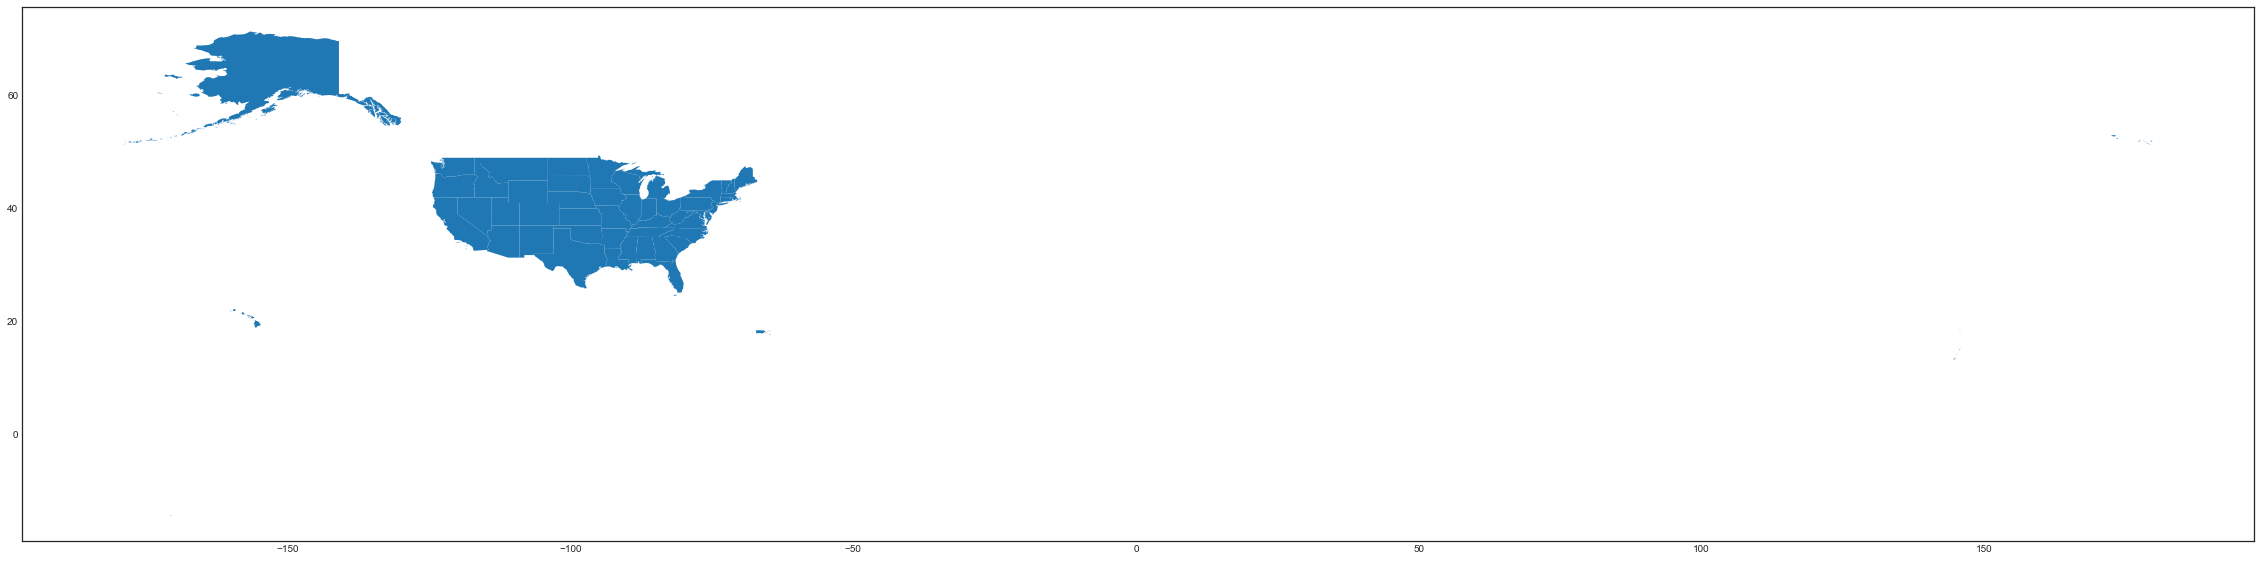

In [165]:
def get_us_multipolygon():
    """Return US multipolygon."""
    
    us = gpd.read_file('cb_2016_us_state_500k.shp')
    #print(us.crs)
    us = us.to_crs(epsg=4326) # reproject to -180, 180
    #print(us.crs)
    #display(us)
    return us
    
# get geopandas data frame of US states/territories polygons
us_polys = get_us_multipolygon()

# how does it look? we plot it
us_polys.plot(figsize=(40, 20))

In [166]:
# how does it look on a leaflet?
m = Map(center=[20, 210], zoom=2, layout=Layout(height='600px', align_self='stretch'))
m

Map(center=[20, 210], layers=(TileLayer(options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='600px'), options=['attribution_control', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=2)

In [167]:
# flatten geopandas data frame into multipolygon for leaflet
us_multipoly = us_polys.unary_union


# multipolygon style
us_style = {
    "color": "purple",
    "weight": 1,
}


def shift_polygon_lon(geojson):
    """Shift lon values to handle dateline wrapping issue."""
    
    for i, p in enumerate(geojson['coordinates']):
        pa = np.array(p)
        #print(pa.shape) 
        #print(pa)
        pa[:,np.where(pa[:,:,0] < 0),0] += 360.
        #print(pa)
        geojson['coordinates'][i] = pa.tolist()
    return geojson
    
    
# plot multipolygon; we shift lons here US states/territories show up across the dateline
us_mp = shift_polygon_lon(us_multipoly.__geo_interface__)
l = GeoJSON(data=us_mp, style=us_style)
m.add_layer(l)

   ## Tidy dataset and extract new features

Next, we tidy the dataset and extract new fields that will be useful once we start our analysis. We discretize categorical features in case we perform machine learning on this dataset in the future. This step of ETL and tidying can take a long time as we are also doing geospatial comparisons of each hurricane track over the US multipolygon to classify US landfall. Additionally, we are collecting the names of the US states/territories that each hurricane crosses (if at all) and adding them each as columns to the tidy dataset. Thus, once we've created the data frame, we save it to a file so that we can just reload the data frame at anytime without having to repeat this expensive process.

In [168]:
# define dict for discrete features
disc_map = {
    "basin": {
         0: "NA", # North Atlantic
         1: "SA", # South Atlantic
         2: "WP", # West Pacific
         3: "EP", # East Pacific
         4: "SP", # South Pacific
         5: "NI", # North Indian
         6: "SI", # South Indian
         7: "AS", # Arabian Sea
         8: "BB", # Bay of Bengal
         9: "EA", # Eastern Australia
        10: "WA", # Western Australia
        11: "CP", # Central Pacific
        12: "CS", # Carribbean Sea
        13: "GM", # Gulf of Mexico
        14: "MM", # Missing
    },
    "nature": {
        0: "TS",  # Tropical
        1: "SS",  # Subtropical
        2: "ET",  # Extratropical
        3: "DS",  # Disturbance
        4: "MX",  # Mix of conflicting reports
        5: "NR",  # Not Reported
        6: "MM",  # Missing
        7: "MM2", # Also Missing
    },
    "track_type": {
        0: "main",  # cyclogenesis to cyclolysis
        1: "merge", # cyclogenesis to merger
        2: "split", # split to cyclolysis
        3: "other", # split to merger
    },
    "month": {
        1: "Jan",
        2: "Feb",
        3: "Mar",
        4: "Apr",
        5: "May",
        6: "Jun",
        7: "Jul",
        8: "Aug",
        9: "Sep",
       10: "Oct",
       11: "Nov",
       12: "Dec",
    }
}


# conversion factors
kt_to_mph = 1.15078


def get_category(mph):
    """Return storm category from mph value of MSW."""
    if mph > 155.: return 5
    elif mph >= 131.: return 4
    elif mph >= 111.: return 3
    elif mph >= 96.: return 2
    elif mph >= 74.: return 1
    else: return 0
    
    
def intersects_us(tracks):
    """Return True if hurricane tracks touches US."""
    
    points = [Point(*pt) for pt in tracks]
    l = LineString(points)
    return l.intersects(us_multipoly)


def get_tidy_dataset(source_ds_file, tidy_ds_file):
    """Return tidy dataset as a data frame. Save tidy dataset
    as an HDF5 file for re-use without having to tidy again."""
    
    # open source file
    ds = NC.Dataset(source_ds_file)
    
    # extract features from each hurricane and save into a list of dicts
    data = []
    landfall_count = 0
    
    # compile regular expression for matching unnamed storms
    unnamed_re = re.compile(r'(UNNAMED|NOT NAMED)')
    
    for i in range(ds.dimensions['storm'].size):
        
        # get number of observations
        obs = ds.variables['numObs'][i]
        if obs <= 2: continue # skip if there are 2 or less observations
        
        # get storm id (storm names can be re-used so we need to track them uniquely)
        id = np.array_str(NC.chartostring(ds.variables['storm_sn'][i,:]))
        
        # extract filterable features first
        name = np.array_str(NC.chartostring(ds.variables['name'][i,:]))
        season = ds.variables['season'][i]
        genesis_basin = ds.variables['genesis_basin'][i]
        
        # extract the landfall feature: if at any time in the storm's track
        # makes landfall, then the feature landfall == True; otherwise it
        # will be landfall == False
        landfall = (ds.variables['landfall'][i,:obs-1] == 0).any()
        
        # get max MSW (maximum sustained wind) for the storm and its category
        wind_wmo = ds.variables['wind_wmo'][i,:obs-1] * kt_to_mph # convert kt to mph
        max_msw_idx = wind_wmo.argmax()
        max_msw = wind_wmo[max_msw_idx]
        max_cat = get_category(max_msw)
        
        # get max MSW (maximum sustained wind) for the storm over land if reached landfall
        # and its max category; determine the summary_idx which will be used to summarize
        # the hurricane as a single data record
        masked_msw = np.ma.masked_where(ds.variables['landfall'][i,:obs-1] != 0.0, wind_wmo)
        masked_msw.set_fill_value(ds.variables['wind_wmo']._FillValue)
        max_land_msw_idx = masked_msw.argmax()
        if landfall:
            max_land_msw = wind_wmo[max_land_msw_idx]
            summary_idx = max_land_msw_idx
        else:
            max_land_msw = 0.0
            summary_idx = max_msw_idx
        max_land_cat = get_category(max_land_msw)
            
        # extract other filterable features
        sub_basin = ds.variables['sub_basin'][i,:obs-1]
        nature = ds.variables['nature_wmo'][i,:obs-1]
        
        # skip records that have missing values in features
        if genesis_basin == 14:
            continue
        # skipping this filter; this filters out the east pacific storms
        #if sub_basin[summary_idx] == 14:
        #    continue
        if nature[summary_idx] in (4, 5, 6, 7):
            continue
            
        # skip records with unnamed storms
        #if unnamed_re.search(name): continue
        
        # extract the rest of the features
        time_wmo = ds.variables['time_wmo'][i,:obs-1]
        time_iso = Time(time_wmo, format='mjd', scale='utc')
        
        # including the time feature as-is (absolute value) from the source doesn't make 
        # sense for prediction; a better feature to derive from the time feature is the 
        # month of year since this can give the algorithm insight into seasonal effects
        month = time_iso[summary_idx].datetime.month
        
        # extract lon and handle wrapping issue
        lon = ds.variables['lon_wmo'][i,:obs-1]
            
        # extract other features
        lat = ds.variables['lat_wmo'][i,:obs-1]
        dist2land = ds.variables['dist2land'][i,:obs-1]
        msw = ds.variables['wind_wmo'][i,:obs-1]
        mcp = ds.variables['pres_wmo'][i,:obs-1]
        tt = ds.variables['track_type'][i]
        
        # create GeoJSON of storm track
        ls = { 
            "type": "LineString",
            "coordinates": np.dstack((lon, lat))[0].tolist(),
        }
        
        # create feature for leaflet display;
        # stuff features into a message info for on_hover display
        msg_tmpl = "i:{} id:{} name:{} season:{} month:{} max_msw_mph:{} " + \
                   "max_cat:{} max_land_msw_mph:{} max_land_cat:{}"
        msg = msg_tmpl.format(i, id, name, season, month, max_msw, max_cat, max_land_msw, max_land_cat)
        ls_feature = { 
            "type": "Feature",
            "properties": { "msg": msg },
            "geometry": ls,
        }
        
        # intersected US
        hit_us = intersects_us(zip(lon, lat)) if landfall else False
        
        # get exact states/territories that were hit by hurricane
        ls_gpd = gpd.GeoDataFrame.from_features([ls_feature], crs=us_polys.crs) # create GPD of hurricane track
        #display(ls_gpd.head())
        #display(us_polys.head())
        us_polys_intersected = gpd.tools.sjoin(us_polys, ls_gpd, how="inner", op="intersects")
        crossed = us_polys_intersected['STUSPS'].tolist()
        #print(crossed)
        
        # create data dict
        data_dict = {
            "id": id,
            "name": name,
            "genesis_basin": disc_map['basin'][genesis_basin],
            "sub_basin": disc_map['basin'][sub_basin[summary_idx]],
            "season": season,
            "time": time_wmo[summary_idx],
            "month": disc_map['month'][month],
            "lon": lon[summary_idx],
            "lat": lat[summary_idx],
            "dist2land": dist2land[summary_idx],
            "msw": msw[summary_idx],
            "mcp": mcp[summary_idx],
            "nature": disc_map['nature'][nature[summary_idx]],
            "track_type": disc_map['track_type'][tt],
            "landfall": landfall,
            "feature": json.dumps(ls_feature),
            "max_msw_mph": max_msw,
            "max_cat": max_cat,
            "max_land_msw_mph": max_land_msw,
            "max_land_cat": max_land_cat,
            "hit_us": hit_us,
        }
        
        # add states/territories hit
        for us_poly_name in us_polys['STUSPS']:
            data_dict[us_poly_name] = True if us_poly_name in crossed else False
        
        # append to data list
        data.append(data_dict)
            
        # tally landfall
        if landfall: landfall_count += 1
            
        # debug
        #if i > 10: break
            
    # create data frame
    df = pd.DataFrame(data)
    
    # save data frame to HDF5
    df.to_hdf(tidy_ds_file, "tropicalstorms", format="table", complib="zlib", complevel=9)
    
    # return data frame
    return df

# tidy data file
tidy_ds_file = "Allstorms.ibtracs_wmo.v03r10-tidy.h5"

# get tidy dataframe
if os.path.exists(tidy_ds_file):
    df = pd.read_hdf(tidy_ds_file)
else:
    df = get_tidy_dataset(source_file, tidy_ds_file)

# print info
display(Markdown("### landfall distribution of tidy dataset"))
display(Markdown("* total storms: {}".format(len(df))))
display(Markdown("* total storms with variable landfall == True: {}".format(len(df[df['landfall'] == True]))))
display(Markdown("* total storms with variable landfall == False: {}".format(len(df[df['landfall'] == False]))))

### landfall distribution of tidy dataset

* total storms: 4657

* total storms with variable landfall == True: 2033

* total storms with variable landfall == False: 2624

## let's display the US landfall hurricanes in table format

In [169]:
df_hit_us = df.loc[df['hit_us'] == True]
display(df_hit_us[['id', 'name', 'season',  'month', 
                   'lon', 'lat', 'nature', 'track_type', 
                   'max_msw_mph', 'max_cat', 
                   'max_land_msw_mph', 'max_land_cat']])

,id,name,season,month,lon,lat,nature,track_type,max_msw_mph,max_cat,max_land_msw_mph,max_land_cat
0,1851175N26270,UNNAMED,1851,Jun,-96.500000,28.099998,TS,main,92.062393,1,92.062393,1
1,1851228N13313,UNNAMED,1851,Aug,-86.099998,29.599998,TS,main,115.077995,3,115.077995,3
4,1852232N21293,UNNAMED,1852,Aug,-88.599998,30.199999,TS,main,115.077995,3,115.077995,3
5,1852247N14309,UNNAMED,1852,Sep,-83.400002,27.900000,TS,main,80.554596,1,80.554596,1
6,1852249N17296,UNNAMED,1852,Sep,-66.099998,17.699999,TS,main,80.554596,1,80.554596,1
8,1852278N14293,UNNAMED,1852,Oct,-84.900002,29.199999,TS,main,103.570198,2,103.570198,2
14,1854176N26268,UNNAMED,1854,Jun,-97.000000,26.199999,TS,main,80.554596,1,80.554596,1
15,1854246N25300,UNNAMED,1854,Sep,-81.099998,31.699999,TS,main,126.585793,3,115.077995,3
16,1854261N28266,UNNAMED,1854,Sep,-95.299995,28.900000,TS,main,103.570198,2,103.570198,2
20,1855252N20274,UNNAMED,1855,Sep,-89.500000,29.199999,TS,main,126.585793,3,126.585793,3


# Analysis of hurricanes that made US landfall

## Visualize storm tracks on map

To start off, let's view the hurricane tracks of those that have made landfall on US soil. Note that US soil includes all US states and territories.

In [170]:
# set styles
landfall_style = {
    "color": "blue",
    "weight": 1,
}
nolandfall_style = {
    "color": "yellow",
    "weight": 1,
}
hover_style = {
    "weight": 5,
}

# hover handler
def hover_handler(event=None, id=None, properties=None):
    sys.stdout.write("\r" + properties['msg'])
    sys.stdout.flush()

In [171]:
# show map    
m = Map(center=[40, 0], zoom=2, layout=Layout(height='600px', align_self='stretch'))
m

Map(center=[40, 0], layers=(TileLayer(options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='600px'), options=['attribution_control', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=2)

In [172]:
# plot multipolygon
l = GeoJSON(data=us_multipoly.__geo_interface__, style=us_style)
m.add_layer(l)


def shift_linestring_lon(geojson):
    """Shift lon values to handle dateline wrapping issue."""
    
    ls_a = np.array(geojson['coordinates'])
    lon = ls_a[:,0]
    lon_diff = lon[0] - lon[-1]
    if lon_diff > 180.:
        ls_a[np.where(lon > 0), 0] -= 360.
    elif lon_diff < -180.:
        ls_a[np.where(lon < 0), 0] += 360.
    geojson['coordinates'] = ls_a.tolist()
    return geojson


# add storms that made landfall on US soil
for i, r in df_hit_us.iterrows():
    ls_feature = json.loads(r.feature)
    ls_feature['geometry'] = shift_linestring_lon(ls_feature['geometry'])
    l = GeoJSON(data=ls_feature, style=landfall_style, hover_style=hover_style)
    l.on_hover(hover_handler)
    m.add_layer(l)

Hover over any track and you should see information on the hurricane below the leaflet map. This visualization is great to get an overall view which US states/territories get hit most often by hurricanes. Obviously the eastern side of the CONUS (continental US) gets hit more often than any US region.

## Temporal range of data 

Let's understand the temporal range of our dataset. The *season* field in our dataset is the integer year that the hurricane track registers to:

In [173]:
min_season = df_hit_us['season'].min()
max_season = df_hit_us['season'].max()
display(Markdown("#### min season: {}".format(min_season)))
display(Markdown("#### max season: {}".format(max_season)))

#### min season: 1851

#### max season: 2016

Thus the earliest recorded hurricane that hit US soil in this dataset occured in 1851 and the latest one occurred in the 2016.

## Statistical analysis

Of all hurricanes that have been recorded in this dataset, how many of them made landfall on US soil?

In [174]:
total_storms = len(df)
total_storms_us = len(df_hit_us)
display(Markdown("#### total storms: {}".format(total_storms)))
display(Markdown("#### total US storms: {}".format(total_storms_us)))
display(Markdown("#### pct US storms: {:02.3f}%".format(total_storms_us/total_storms*100.)))

#### total storms: 4657

#### total US storms: 635

#### pct US storms: 13.635%

Let's get an idea of the number of hurricanes that have hit US soil over time. We'll play around with bin sizes to find an appropriate size:

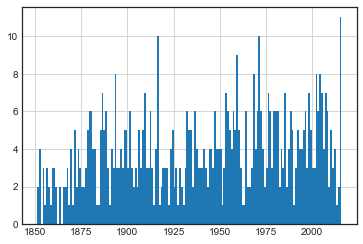

In [175]:
df_hit_us['season'].hist(bins=int(max_season-min_season))

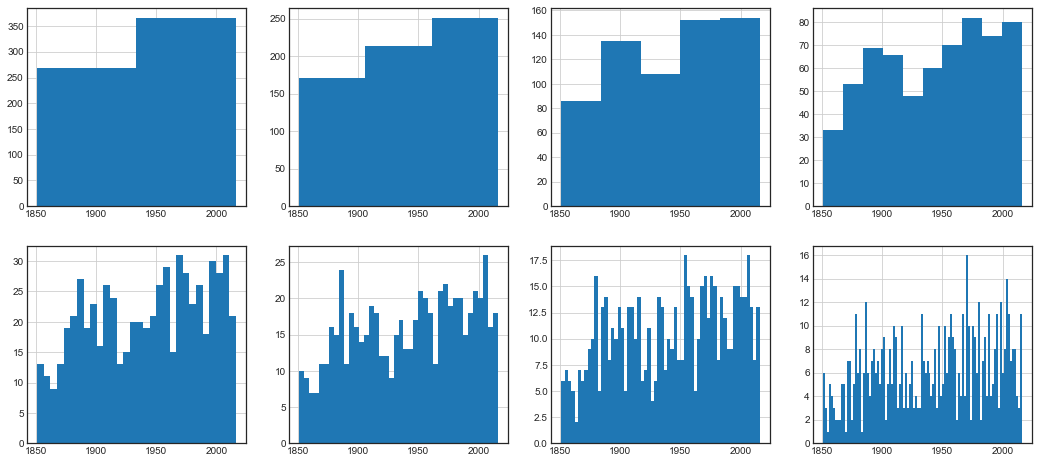

In [176]:
binsizes = [2, 3, 5, 10, 30, 40, 60, 100 ]

plt.figure(1, figsize=(18,8))
for i, bins in enumerate(binsizes): 
    plt.subplot(2, 4, i+1)
    df_hit_us['season'].hist(bins=bins)

[(1851, 2016)]

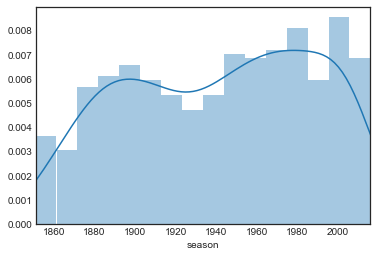

In [177]:
# let try a combination histogram and kernel density plot using bin size of a decade
sns.distplot(df_hit_us['season'], bins=int((max_season-min_season)/10), 
             hist_kws={'normed':True}).set(xlim=(min_season, max_season))

There seems to be a bimodal distribution but sample size is relatively small. Let's get the descriptive statistics to get an overall idea of how many storms hit the US every year:

count    166.000000
mean       3.825301
std        2.014995
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: season, dtype: float64

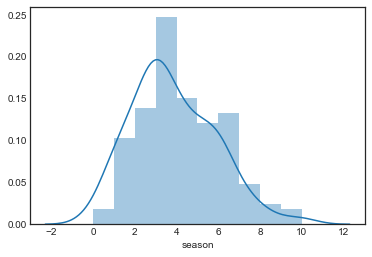

In [178]:
# define function to add 0-value seasons
def add_zero_seasons(df, min, max):
    for i in range(min, max+1):
        if i not in df: df[i] = 0
    return df

us_hits = add_zero_seasons(df_hit_us['season'].value_counts(), min_season, max_season)
display(us_hits.describe())
sns.distplot(us_hits, hist_kws={'normed':True})

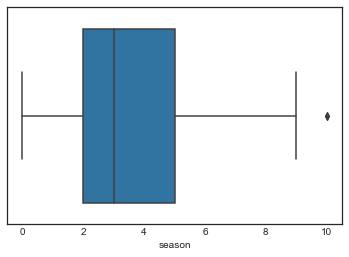

In [179]:
sns.boxplot(us_hits)

We see that every year we can expect between 3 and 4 tropical storms/hurricanes to make landfall on US soil. The distribution of this sample is right-skewed.
However, how does the distribution look when we take into account the strength of the hurricane at landfall? The Saffir/Simpson Hurricane Scale characterizes hurricanes by wind speeds in miles per hour:

|scale|winds (mph)|surge (feet)|damage|
|---|---|---|---|
|1|74-95|4-5|minimal|
|2|96-110|6-8|moderate|
|3|111-130|9-12|extensive|
|4|131-155|13-18|extreme|
|5|>155|>18|catastrophic|

Let's filter for hurricanes that hit US soil that are category 3 and above and redo our analysis above:

### Category 3+

In [180]:
df_hit_us_cat3plus = df_hit_us.loc[df_hit_us['max_land_cat'] > 2]
total_storms_us_cat3plus = len(df_hit_us_cat3plus)
display(Markdown("#### total US storms: {}".format(total_storms_us)))
display(Markdown("#### total US storms cat 3+: {}".format(total_storms_us_cat3plus)))
display(Markdown("#### pct US storms cat 3+: {:02.3f}%".format(total_storms_us_cat3plus/total_storms_us*100.)))

#### total US storms: 635

#### total US storms cat 3+: 113

#### pct US storms cat 3+: 17.795%

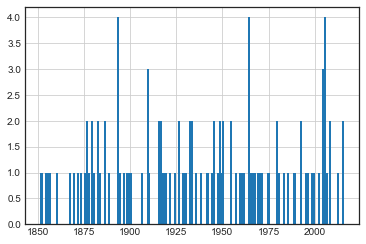

In [181]:
df_hit_us_cat3plus['season'].hist(bins=int(max_season-min_season))

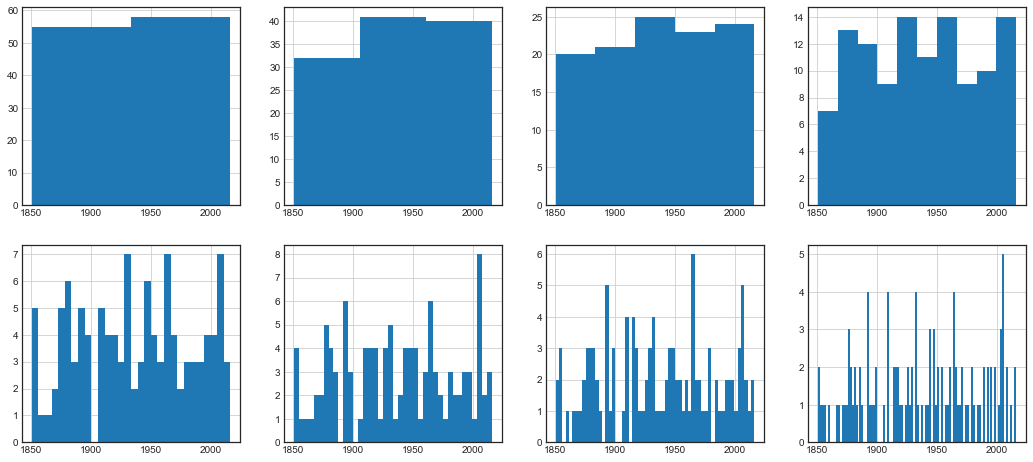

In [182]:
plt.figure(1, figsize=(18,8))
for i, bins in enumerate(binsizes): 
    plt.subplot(2, 4, i+1)
    df_hit_us_cat3plus['season'].hist(bins=bins)

[(1851, 2016)]

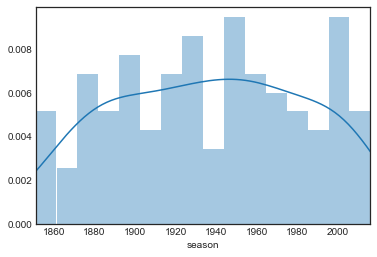

In [183]:
# let try a combination histogram and kernel density plot using bin size of a decade
sns.distplot(df_hit_us_cat3plus['season'], bins=int((max_season-min_season)/10), 
             hist_kws={'normed':True}).set(xlim=(min_season, max_season))

count    166.000000
mean       0.680723
std        0.838752
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: season, dtype: float64

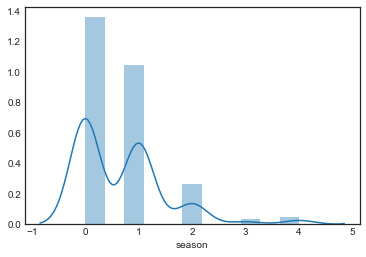

In [184]:
us_hits_cat3plus = add_zero_seasons(df_hit_us_cat3plus['season'].value_counts(), min_season, max_season)
display(us_hits_cat3plus.describe())
sns.distplot(us_hits_cat3plus, hist_kws={'normed':True})

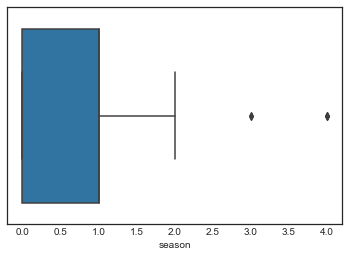

In [185]:
sns.boxplot(us_hits_cat3plus)

### Category 4+

In [186]:
df_hit_us_cat4plus = df_hit_us.loc[df_hit_us['max_land_cat'] > 3]
total_storms_us_cat4plus = len(df_hit_us_cat4plus)
display(Markdown("#### total US storms: {}".format(total_storms_us)))
display(Markdown("#### total US storms cat 4+: {}".format(total_storms_us_cat4plus)))
display(Markdown("#### pct US storms cat 4+: {:02.3f}%".format(total_storms_us_cat4plus/total_storms_us*100.)))

#### total US storms: 635

#### total US storms cat 4+: 50

#### pct US storms cat 4+: 7.874%

The occurrences of storms that hit landfall decreases as the category increases, thankfully. So how often do they occur? 

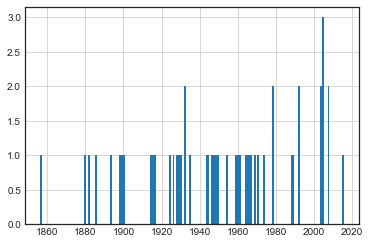

In [187]:
df_hit_us_cat4plus['season'].hist(bins=int(max_season-min_season))

[(1851, 2016)]

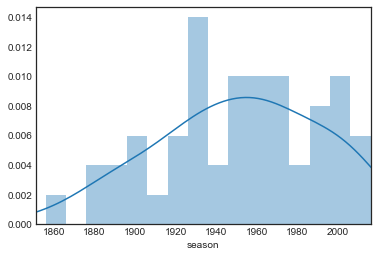

In [188]:
# category 4+
sns.distplot(df_hit_us_cat4plus['season'], bins=int((max_season-min_season)/10), 
             hist_kws={'normed':True}).set(xlim=(min_season, max_season))

count    166.000000
mean       0.301205
std        0.555631
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: season, dtype: float64

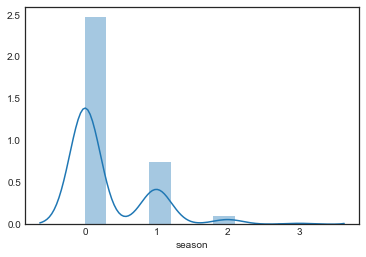

In [189]:
us_hits_cat4plus = add_zero_seasons(df_hit_us_cat4plus['season'].value_counts(), min_season, max_season)
display(us_hits_cat4plus.describe())
sns.distplot(us_hits_cat4plus, bins=10, hist_kws={'normed':True})

### Category 5

In [190]:
df_hit_us_cat5 = df_hit_us.loc[df_hit_us['max_land_cat'] > 4]
total_storms_us_cat5 = len(df_hit_us_cat5)
display(Markdown("#### total US storms: {}".format(total_storms_us)))
display(Markdown("#### total US storms cat 5: {}".format(total_storms_us_cat5)))
display(Markdown("#### pct US storms cat 5: {:02.3f}%".format(total_storms_us_cat5/total_storms_us*100.)))

#### total US storms: 635

#### total US storms cat 5: 13

#### pct US storms cat 5: 2.047%

Only 13 category 5 storms have ever hit US soil!

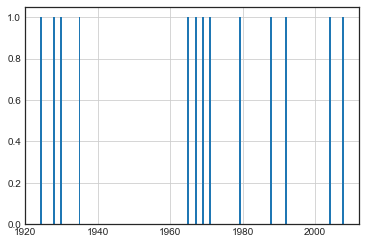

In [191]:
# how often do they occur?
df_hit_us_cat5['season'].hist(bins=int(max_season-min_season))

[(1851, 2016)]

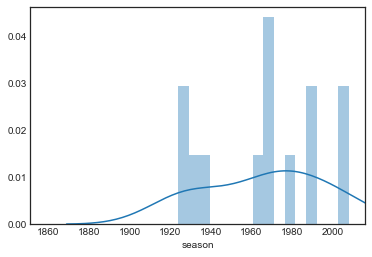

In [192]:
# category 5
sns.distplot(df_hit_us_cat5['season'], bins=int((max_season-min_season)/10), 
             hist_kws={'normed':True}).set(xlim=(min_season, max_season))

count    166.000000
mean       0.078313
std        0.269477
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: season, dtype: float64

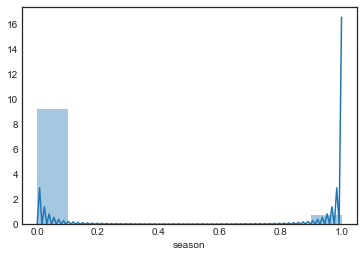

In [193]:
# category 5
us_hits_cat5 = add_zero_seasons(df_hit_us_cat5['season'].value_counts(), min_season, max_season)
display(us_hits_cat5.describe())
sns.distplot(us_hits_cat5, bins=10, hist_kws={'normed':True})

### Multiple storms in the same season

Let's take a look at a table of the 13 category 5 storms that made US landfall:

In [194]:
display(df_hit_us_cat5[['id', 'name', 'season',  'month', 
                        'max_msw_mph', 'max_cat', 
                        'max_land_msw_mph', 'max_land_cat']])

,id,name,season,month,max_msw_mph,max_cat,max_land_msw_mph,max_land_cat
521,1924288N16277,UNNAMED,1924,Oct,166.863098,5,166.863098,5
549,1928250N14343,UNNAMED,1928,Sep,161.109192,5,161.109192,5
558,1930241N13317,UNNAMED,1930,Sep,155.355301,5,155.355301,5
623,1935241N23291,UNNAMED,1935,Sep,184.124786,5,184.124786,5
1312,1965239N11310,BETSY,1965,Sep,155.355301,5,155.355301,5
1420,1967249N14303,BEULAH,1967,Sep,161.109192,5,161.109192,5
1531,1969226N18280,CAMILLE,1969,Aug,172.616989,5,172.616989,5
1674,1971249N11302,EDITH,1971,Sep,161.109192,5,161.109192,5
2139,1979238N12324,DAVID,1979,Aug,172.616989,5,172.616989,5
2759,1988253N12306,GILBERT,1988,Sep,184.124786,5,161.109192,5


A look at the seasons show that no two category 5 hurricanes have ever hit US soil within the same season. To validate:

In [195]:
df_hit_us_cat5['season'].value_counts().sort_index()


1924    1
1928    1
1930    1
1935    1
1965    1
1967    1
1969    1
1971    1
1979    1
1988    1
1992    1
2004    1
2008    1
Name: season, dtype: int64

Let's show the only category 5 hurricanes to make US landfall on a map:

In [196]:
# show map    
m = Map(center=[40, 0], zoom=2, layout=Layout(height='600px', align_self='stretch'))
m

Map(center=[40, 0], layers=(TileLayer(options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='600px'), options=['attribution_control', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=2)

In [197]:
# plot multipolygon
l = GeoJSON(data=us_multipoly.__geo_interface__, style=us_style)
m.add_layer(l)

# add storms that made landfall on US soil
for i, r in df_hit_us_cat5.iterrows():
    ls_feature = json.loads(r.feature)
    ls_feature['geometry'] = shift_linestring_lon(ls_feature['geometry'])
    l = GeoJSON(data=ls_feature, style=landfall_style, hover_style=hover_style)
    l.on_hover(hover_handler)
    m.add_layer(l)

Note that the 13 category 5 hurricanes that hit the US all hit on the south eastern side of the continental US. Zooming in further, the states of Louisiana and Florida are the US states that experience these category 5 storms.

What about for category 4 and above? Let's take a look at a table of the category 4+ storms that made US landfall:

In [198]:
display(df_hit_us_cat4plus[['id', 'name', 'season',  'month', 
                        'max_msw_mph', 'max_cat', 
                        'max_land_msw_mph', 'max_land_cat']])

,id,name,season,month,max_msw_mph,max_cat,max_land_msw_mph,max_land_cat
21,1856221N25277,UNNAMED,1856,Aug,149.601395,4,149.601395,4
171,1880217N16300,UNNAMED,1880,Aug,149.601395,4,149.601395,4
193,1882278N11279,UNNAMED,1882,Oct,138.093597,4,138.093597,4
214,1886224N11303,UNNAMED,1886,Aug,149.601395,4,149.601395,4
291,1893271N16278,UNNAMED,1893,Oct,132.339691,4,132.339691,4
326,1898268N16302,UNNAMED,1898,Oct,132.339691,4,132.339691,4
333,1899215N12329,UNNAMED,1899,Aug,149.601395,4,143.847488,4
341,1900239N15318,UNNAMED,1900,Sep,143.847488,4,138.093597,4
451,1915218N14334,UNNAMED,1915,Aug,143.847488,4,143.847488,4
461,1916225N13305,UNNAMED,1916,Aug,132.339691,4,132.339691,4


How many category 4+ hurricanes have ever hit US soil within the same season:

In [199]:
df_hit_us_cat4plus['season'].value_counts().sort_index()

1856    1
1880    1
1882    1
1886    1
1893    1
1898    1
1899    1
1900    1
1915    1
1916    1
1917    1
1924    1
1926    1
1928    1
1929    1
1930    1
1932    2
1935    1
1944    1
1945    1
1947    1
1948    1
1949    1
1950    1
1954    1
1959    1
1960    1
1961    1
1964    1
1965    1
1966    1
1967    1
1969    1
1971    1
1974    1
1979    2
1988    1
1989    1
1992    2
2004    2
2005    3
2008    2
2016    1
Name: season, dtype: int64

Interestingly, there are 5 seasons (1932, 1979, 1992, 2004, 2005, and 2008) where 2 or more category 4+ hurricanes have made landfall. In 2005, 3 category 4+ hurricanes hit! Let's plot them on a map to see where they hit exactly. 

In [200]:
# show map    
m = Map(center=[40, 0], zoom=2, layout=Layout(height='600px', align_self='stretch'))
m

Map(center=[40, 0], layers=(TileLayer(options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='600px'), options=['attribution_control', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=2)

In [201]:
# plot multipolygon
l = GeoJSON(data=us_multipoly.__geo_interface__, style=us_style)
m.add_layer(l)

# multistorm years
df_multihits_years = df_hit_us_cat4plus['season'].value_counts() > 1


# add storms that made landfall on US soil
count = {}
colors = sns.color_palette("bright").as_hex()
for k, v in df_multihits_years.iteritems():
    if v == False: continue
    count[k] = 0
    tmp_df = df_hit_us_cat4plus.loc[df_hit_us_cat4plus['season'] == k]
    year_style = {
        "color": colors[len(count)-1],
        "weight": 1,
    }
    for i, r in tmp_df.iterrows():
        ls_feature = json.loads(r.feature)
        ls_feature['geometry'] = shift_linestring_lon(ls_feature['geometry'])
        l = GeoJSON(data=ls_feature, style=year_style, hover_style=hover_style)
        l.on_hover(hover_handler)
        m.add_layer(l)
        count[k] += 1
#print(count)

With the exception of Iniki which hit Hawaii in 1992, all of the multistorm category 4+ seasons hit the southeastern CONUS. In fact in 2005, hurricanes Wilma (cat 4), Katrina (cat 4), and Dennis (cat 4) all hit that part of the US within 3 months of each other deeming it the most active Atlantic hurricane season in recorded history.

Considering the temporal spacing of the seasons with multiple category 4+ hurricanes, 1932, 1979, 1992, 2004, 2005, 2008, and taking into account that the 2 category 4+ hurricanes that hit Texas and Florida in 2017 are not included yet in the IBTrACS dataset, there seems to be an increasing trend that multiple hits of these category 4+ hurricanes within the same season are occurring more frequently that in decades before:

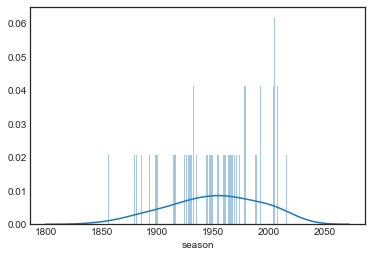

In [202]:
sns.distplot(df_hit_us_cat4plus['season'], bins=int(max_season-min_season), hist_kws={'normed':True})

Finally, we can draw a joint plot with bivariate KDE as well as marginal distributions with KDE of all tropical storms that have made US landfall to get an overall picture of the occurrences the various categories of tropical storms:

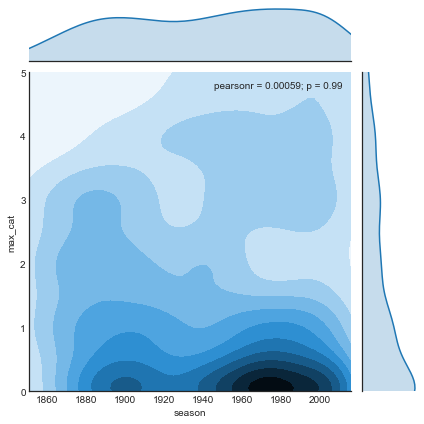

In [203]:
sns.jointplot(df_hit_us['season'], df_hit_us['max_cat'], kind="kde", xlim=(min_season, max_season), ylim=(0,5))

Note in the plot above that the protruding lobe in the upper right corner of the plot shows ann increase in the number of 3+ category storms in the last 100 years.

How many category 3+ hurricanes have ever hit US soil within the same season:

In [204]:
df_hit_us_cat3plus['season'].value_counts().sort_index()

1851    1
1852    1
1854    1
1855    1
1856    1
1860    1
1867    1
1869    1
1871    1
1873    1
1875    1
1876    2
1877    1
1879    2
1880    1
1882    2
1883    1
1886    2
1888    1
1893    4
1894    1
1896    1
1898    1
1899    1
1900    1
1906    1
1909    3
1910    1
1915    2
1916    2
       ..
1960    1
1961    1
1964    4
1965    1
1966    1
1967    1
1969    1
1970    1
1971    1
1974    1
1975    1
1979    2
1980    1
1983    1
1985    1
1988    1
1989    1
1992    2
1995    1
1996    1
1998    1
1999    1
2002    1
2004    3
2005    4
2006    1
2008    2
2012    1
2015    1
2016    1
Name: season, Length: 84, dtype: int64

In [205]:
# show map    
m = Map(center=[40, 0], zoom=2, layout=Layout(height='600px', align_self='stretch'))
m

Map(center=[40, 0], layers=(TileLayer(options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='600px'), options=['attribution_control', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=2)

In [206]:
# plot multipolygon
l = GeoJSON(data=us_multipoly.__geo_interface__, style=us_style)
m.add_layer(l)

# multistorm years
df_multihits_years = df_hit_us_cat3plus['season'].value_counts() > 1
n_seasons = df_multihits_years.value_counts()[True]
display(Markdown("#### Number of seasons with multiple category 3+ US hits: {}".format(n_seasons)))

## add storms that made landfall on US soil
count = {}
df_mh_cat3 = []
colors = sns.color_palette("bright", n_colors=n_seasons).as_hex()
for k, v in df_multihits_years.iteritems():
    if v == False: continue
    count[k] = 0
    tmp_df = df_hit_us_cat3plus.loc[df_hit_us_cat3plus['season'] == k]
    year_style = {
        "color": colors[len(count)-1],
        "weight": 1,
    }
    for i, r in tmp_df.iterrows():
        ls_feature = json.loads(r.feature)
        ls_feature['geometry'] = shift_linestring_lon(ls_feature['geometry'])
        l = GeoJSON(data=ls_feature, style=year_style, hover_style=hover_style)
        l.on_hover(hover_handler)
        m.add_layer(l)
        count[k] += 1
        df_mh_cat3.append(r)
display(count)

#### Number of seasons with multiple category 3+ US hits: 21

{1876: 2,
 1879: 2,
 1882: 2,
 1886: 2,
 1893: 4,
 1909: 3,
 1915: 2,
 1916: 2,
 1926: 2,
 1932: 2,
 1933: 2,
 1945: 2,
 1948: 2,
 1950: 2,
 1954: 2,
 1964: 4,
 1979: 2,
 1992: 2,
 2004: 3,
 2005: 4,
 2008: 2}

In [207]:
df_mh_cat3 = pd.DataFrame(df_mh_cat3)
display(df_mh_cat3[['id', 'name', 'season',  'month', 
                        'max_msw_mph', 'max_cat', 
                        'max_land_msw_mph', 'max_land_cat']])

,id,name,season,month,max_msw_mph,max_cat,max_land_msw_mph,max_land_cat
285,1893226N10310,UNNAMED,1893,Aug,120.831894,3,115.077995,3
286,1893228N17339,UNNAMED,1893,Aug,120.831894,3,115.077995,3
290,1893268N12335,UNNAMED,1893,Oct,120.831894,3,120.831894,3
291,1893271N16278,UNNAMED,1893,Oct,132.339691,4,132.339691,4
3860,2005186N12299,DENNIS,2005,Jul,149.601395,4,138.093597,4
3881,2005236N23285,KATRINA,2005,Aug,172.616989,5,143.847488,4
3896,2005261N21290,RITA,2005,Sep,178.370895,5,115.077995,3
3910,2005289N18282,WILMA,2005,Oct,184.124786,5,138.093597,4
1264,1964234N13316,CLEO,1964,Aug,155.355301,5,149.601395,4
1266,1964242N14342,DORA,1964,Sep,132.339691,4,115.077995,3


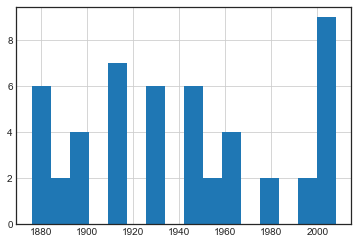

In [208]:
df_mh_cat3['season'].hist(bins=int((max_season-min_season)/10))
#df_mh_cat3['season'].hist(bins=int(max_season-min_season))

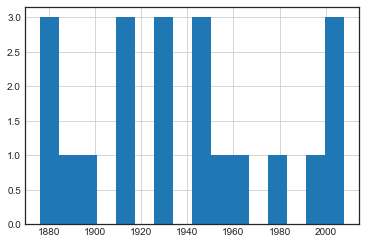

In [209]:
df_mh_cat3_seasons = pd.DataFrame([{'season': k, 'count': count[k]} for k in sorted(count)])
df_mh_cat3_seasons['season'].hist(bins=int((max_season-min_season)/10))

In [210]:
# show differences between occurrences of seasons with multiple major hurricane strikes
display(df_mh_cat3_seasons['season'].diff())
display(df_mh_cat3_seasons['season'].diff().describe())

0      NaN
1      3.0
2      3.0
3      4.0
4      7.0
5     16.0
6      6.0
7      1.0
8     10.0
9      6.0
10     1.0
11    12.0
12     3.0
13     2.0
14     4.0
15    10.0
16    15.0
17    13.0
18    12.0
19     1.0
20     3.0
Name: season, dtype: float64

count    20.000000
mean      6.600000
std       4.935372
min       1.000000
25%       3.000000
50%       5.000000
75%      10.500000
max      16.000000
Name: season, dtype: float64

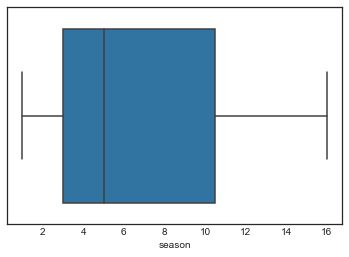

In [211]:
# box plot of differences between occurrences of seasons with multiple major hurricane strikes
sns.boxplot(df_mh_cat3_seasons['season'].diff())